# Python for Data Analytics

In [1]:
# import required libraries for assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Task 1:** Load your data

- `data/afl/stats.csv"
- `data/afl/players.csv"
- `data/afl/games.csv"

Take your data from the three files above. ✅

Load your data into a ***single*** dataframe by merging the three data sets. ✅

***Marking Criteria:*** *Your data is loaded into a single pandas dataframe that contains all the data from the original files merged together. Your notebook runs without error.* ***(10%)***

In [2]:
# import required datasets for assignment
stats = pd.read_csv('/workspace/IATD-Python-Data/data/afl/stats.csv')
players = pd.read_csv('/workspace/IATD-Python-Data/data/afl/players.csv')
games = pd.read_csv('/workspace/IATD-Python-Data/data/afl/games.csv')

# join all datasets together into a dataframe titled = 'df'
df = stats.merge(players, on='playerId', how='left').merge(games, on='gameId', how='left')

### **Task 2:** Plot one player

- For a particular player - say "Franklin, Lance" - plot their accumlation of goals over time.

- The x-axis should be the number of games played and the y-axis should be the number of goals accumulated.

- Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

***Marking Criteria:*** *Your notebook includes a chart of Lance Franklin’s goals drawn from the example data. The chart should accurately represent the progression of Lance Franklin’s goals over the data set period. Your analysis should include an enlightening explanation in Markdown blocks.* ***(30%)***

In [88]:
target = df.query('displayName_x == "Franklin, Lance"')
game_type = target['round_x'].str.contains('R')
target[game_type]

# game_type = match_type.mask(match_type[:1] == 'R')

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,round_y,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall
7917,2021R203,Sydney,2021,R2,2005708162,"Franklin, Lance",301,9,7,2,...,R2,27-Mar-2021,S.C.G.,1:45 PM,23946,Sydney,121,Adelaide,88,0.0
7964,2021R401,Sydney,2021,R4,2005708162,"Franklin, Lance",302,9,7,4,...,R4,08-Apr-2021,S.C.G.,7:20 PM,28039,Sydney,83,Essendon,80,34.6
7986,2021R504,Sydney,2021,R5,2005708162,"Franklin, Lance",303,14,12,8,...,R5,17-Apr-2021,S.C.G.,4:35 PM,33541,Sydney,69,Greater Western Sydney,71,0.0
8055,2021R805,Sydney,2021,R8,2005708162,"Franklin, Lance",304,6,5,3,...,R8,08-May-2021,M.C.G.,7:25 PM,35567,Melbourne,67,Sydney,58,0.0
8079,2021R902,Sydney,2021,R9,2005708162,"Franklin, Lance",305,12,6,2,...,R9,15-May-2021,S.C.G.,1:45 PM,31448,Sydney,72,Collingwood,42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85161,2012R1205,Hawthorn,2012,R12,2005708162,"Franklin, Lance",154,17,15,4,...,R12,17-Jun-2012,M.C.G.,1:10 PM,35492,Hawthorn,135,Brisbane Lions,70,1.0
85183,2012R1401,Hawthorn,2012,R14,2005708162,"Franklin, Lance",155,23,19,7,...,R14,29-Jun-2012,M.C.G.,7:50 PM,65047,Carlton,70,Hawthorn,120,0.0
85205,2012R1507,Hawthorn,2012,R15,2005708162,"Franklin, Lance",156,9,7,5,...,R15,08-Jul-2012,M.C.G.,1:10 PM,26518,Hawthorn,193,Greater Western Sydney,31,0.0
85360,2012R2204,Hawthorn,2012,R22,2005708162,"Franklin, Lance",157,14,10,4,...,R22,25-Aug-2012,S.C.G.,4:40 PM,31167,Sydney,95,Hawthorn,102,0.0


ValueError: s must be a scalar, or float array-like with the same size as x and y

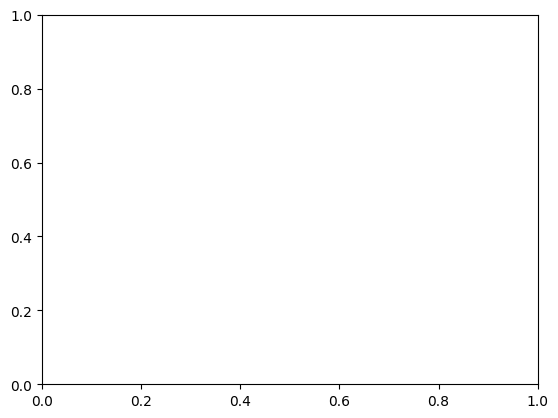

In [45]:
# select data:
fl = df.query('displayName_x == "Franklin, Lance"')
fl_x = fl['year_x']
fl_y = fl['Goals']

homeTeamScore
rainfall

# plot:
plt.scatter(  fl['year_x']
            , fl['Goals']
            , alpha=0.2
            , s=fl['round_x'] # fl['attendance'] * 0.003
            , cmap='viridis'
            )

# label:
plt.xlabel('Year')
plt.ylabel('Goals');

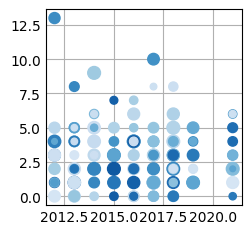

In [63]:
plt.style.use('_mpl-gallery')

# select data:
fl = df.query('displayName_x == "Franklin, Lance"')
fl_x = fl['year_x']
fl_y = fl['Goals']

# size and color:
sizes  = np.random.uniform(15, 85, len(fl_x))         # fl['attendance']
colors = np.random.uniform(15, 85, len(fl_y))         # fl['Kicks'] 

# plot:
fig, ax = plt.subplots()

ax.scatter(fl_x, fl_y, s=sizes, c=colors, vmin=0, vmax=100)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [65]:
print(fl['year_x'])

7917     2021
7964     2021
7986     2021
8055     2021
8079     2021
         ... 
85360    2012
85381    2012
85404    2012
85426    2012
85448    2012
Name: year_x, Length: 176, dtype: int64


In [54]:
# df.query('displayName_x == "Franklin, Lance"')
fl_y

7917     3
7964     3
7986     5
8055     0
8079     2
        ..
85360    4
85381    4
85404    4
85426    3
85448    3
Name: Goals, Length: 176, dtype: int64

### **Task 3:** Plot multiple players

✒️ In the one chart, plot the lines for the following players:

> •	"Franklin, Lance"
> 
> • "Papley, Tom"
> 
> •	"Mumford, Shane"
> 
> •	"Hooker, Cale".

✒️ Plot each in a different colour so they can be distinguished and add a legend.

***Marking Criteria:*** *Your notebook includes a chart of the four named player’s goals drawn from the example data. The chart should accurately represent the underlying data and be easy to interpret.  Your analysis should include an enlightening explanation in Markdown blocks.* ***(30%)***

### **Task 4:** Linear Regression

> Create a second plot showing just "Franklin, Lance" and "Hooker, Cale" but include the linear regression line for each.
> 
> In other words, as well as showing their actual cummulative goals over time, plot their predicted goals over time where the prediction is done via Linear Regression.
> 
> Be sure to use different colours for each line and include a legend.

***Marking Criteria:*** *Your notebook includes a single chart showing the goal progression and the best fit linear regression line for the two named players. It must be easy for the reader to distinguish the data presented on the chart and interpret it with help from explanatory Markdown blocks.* ***(30%)***

### Tips

**Note:** There is a quirk in this data:
Because it only starts at 2012, there are many players who start the dataset with more than one game already played.
That is why you will see some players have 0 goals at game number 200.

> It is not that they kicked no goals for 250 games, it is that those games are not included in the dataset.
> 
> It is up to you to choose how to organise your analysis to account for this.
> 
> In other words, how can you make your visualisation work given this quirk?

**Hint:** you might find the `reset_index` method useful.

2
30%	
	

